In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_cerveza = pd.read_csv('JuegoCerveza.csv')
datos = pd.DataFrame ({'demandaRetail': df_cerveza['R_demanda'], 'demandaMayorista': df_cerveza['M_demanda']})

Pendiente: 0.6718
y-intercepto: 0.8808
entonces
 f(x) = 0.6718x + 0.880791
   demandaRetail  demandaMayorista        fx     error
0              4                 2  3.567797  1.567797
1              2                 1  2.224294  1.224294
2              2                 1  2.224294  1.224294
3              4                 2  3.567797  1.567797
4              4                 3  3.567797  0.567797


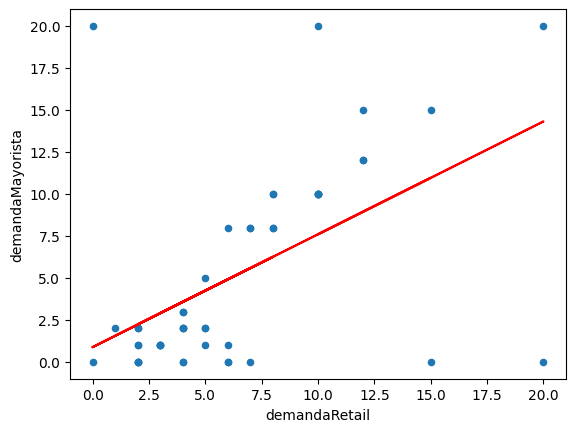

In [10]:
from scipy import stats
import matplotlib.pyplot as plt

df_regresion = datos[['demandaMayorista','demandaRetail']].copy()
m,b,r,p,se = stats.linregress(df_regresion['demandaRetail'],df_regresion['demandaMayorista'])

print('Pendiente: {:.4f}\ny-intercepto: {:.4f}'.format(m,b))
print('entonces\n f(x) = {:.4f}x + {:4,f}'.format(m,b))
pendiente = m
intercepto = b
df_regresion['fx'] = (m * df_regresion['demandaRetail']) + b
df_regresion['error'] = df_regresion['fx'] - df_regresion['demandaMayorista']

df_regresion.plot.scatter(x='demandaRetail',y='demandaMayorista')

plt.plot(df_regresion['demandaRetail'], df_regresion['fx'], color = 'red')
print((df_regresion[['demandaRetail','demandaMayorista','fx','error']]).head())
plt.show()

In [14]:
def f(x):
    m = 0.6718
    b = 0.8808
    return m*x+b

demandaRetail = int(5)

prediccion = f(demandaRetail)

demandaMayorista_esperado = round(max(0,min(10000,prediccion)))

print('Una demanda de {} en el Retail puede resultar en una demanda esperada por el Mayorista de {}'.format(demandaRetail,demandaMayorista_esperado))


Una demanda de 5 en el Retail puede resultar en una demanda esperada por el Mayorista de 4


In [ ]:
""" import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(6,4))
datos.plot(
    x = 'demandaRetail',
    y = 'demandaMayorista',
    c = 'blue',
    kind = 'scatter',
    ax = ax
)

ax.set_title('Relacion demanda e inventario') """

In [ ]:
""" from scipy.stats import pearsonr

corr_test = pearsonr(x=datos['demandaRetail'], y=datos['demandaMayorista'])
print("Coeficiente de correlacion de Pearson:",corr_test[0])
print("P-value:",corr_test[1]) """

In [ ]:
""" from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = datos[['demandaRetail']]
y = datos[['demandaMayorista']]

X_train , X_test, y_train, y_test = train_test_split(
    X.values.reshape(-1,1),
    y.values.reshape(-1,1),
    train_size = 0.8,
    random_state = 1234,
    shuffle=True
)

modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1,1), y=y_train)

print("Intercept:", modelo.intercept_)
print("Ceoficiente:", list(zip(X.columns, modelo.coef_.flatten(),)))
print("Coeficiente de deternminacion R^2:", modelo.score(X,y)) """